In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
columns = [
    "age",
    "sex",
    "chest_pain_type",
    "resting_blood_pressure",
    "serum_cholesterol",
    "fasting_blood_sugar",
    "resting_electrocardiographic_results",
    "maximum_heart_rate_achieved",
    "exercise_induced_angina",
    "st_depression_exercise",
    "st_slope",
    "number_of_major_vessels",
    "thalassemia",
    "heart_disease_target"
]


For the processed.cleveland.data not have labels so i have mentioned column names in above cell

In [3]:
def load_data(path):
    df=pd.read_csv(path,header=None, names=columns)
    df.replace("?",np.nan, inplace=True)
    df=df.apply(pd.to_numeric)
    df.dropna(inplace=True)
    df["heart_disease_target"]=df["heart_disease_target"].apply(lambda x:1 if x>0 else 0)
    return df

df = load_data(r"D:\MLOPS\DSA\Project\heart_disease\processed.cleveland.data")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   297 non-null    float64
 1   sex                                   297 non-null    float64
 2   chest_pain_type                       297 non-null    float64
 3   resting_blood_pressure                297 non-null    float64
 4   serum_cholesterol                     297 non-null    float64
 5   fasting_blood_sugar                   297 non-null    float64
 6   resting_electrocardiographic_results  297 non-null    float64
 7   maximum_heart_rate_achieved           297 non-null    float64
 8   exercise_induced_angina               297 non-null    float64
 9   st_depression_exercise                297 non-null    float64
 10  st_slope                              297 non-null    float64
 11  number_of_major_vessels 

No missing values occured , it is a clean dataset
-   297-instances
-   14-features
-   0-12->float values
-   13 is int value


In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_exercise,st_slope,number_of_major_vessels,thalassemia,heart_disease_target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


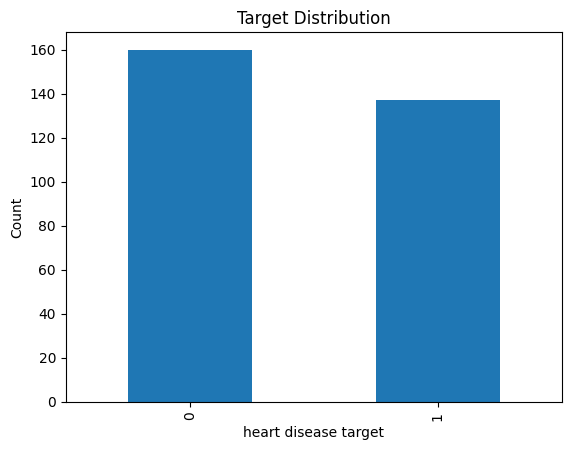

In [6]:
plt.figure()
df["heart_disease_target"].value_counts().plot(kind="bar")
plt.xlabel("heart disease target")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()


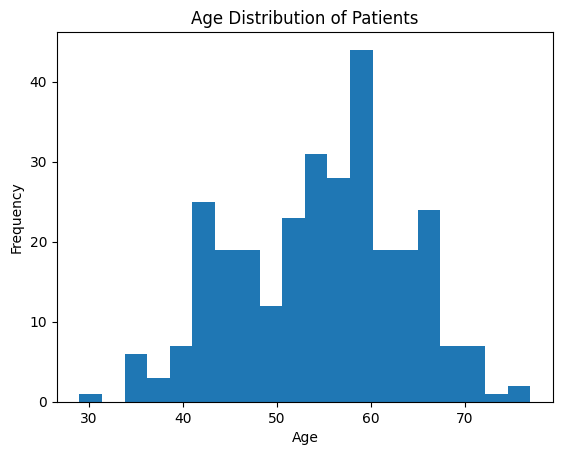

In [7]:

plt.figure()
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()


<Figure size 640x480 with 0 Axes>

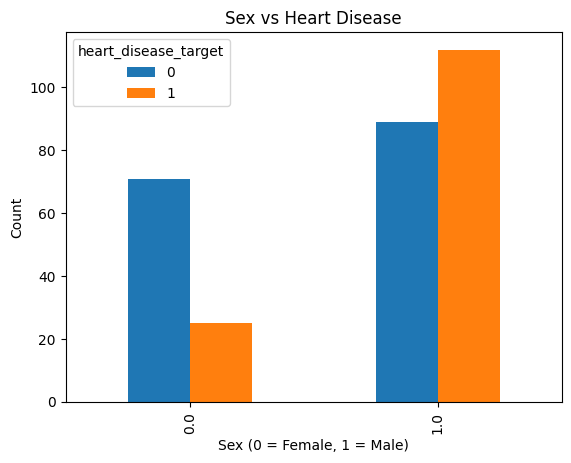

In [8]:
plt.figure()
pd.crosstab(df["sex"], df["heart_disease_target"]).plot(kind="bar")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.title("Sex vs Heart Disease")
plt.show()


<Figure size 640x480 with 0 Axes>

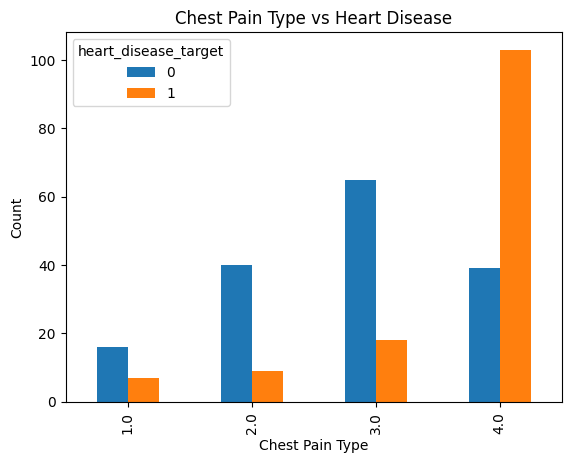

In [9]:
plt.figure()
pd.crosstab(df["chest_pain_type"], df["heart_disease_target"]).plot(kind="bar")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


<Figure size 640x480 with 0 Axes>

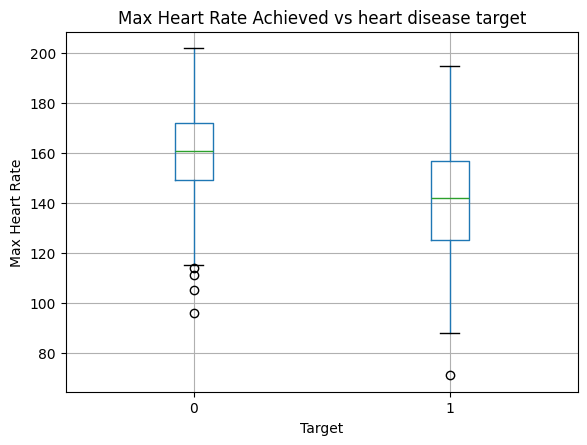

In [10]:
plt.figure()
df.boxplot(column="maximum_heart_rate_achieved", by="heart_disease_target")
plt.xlabel("Target")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate Achieved vs heart disease target")
plt.suptitle("")
plt.show()


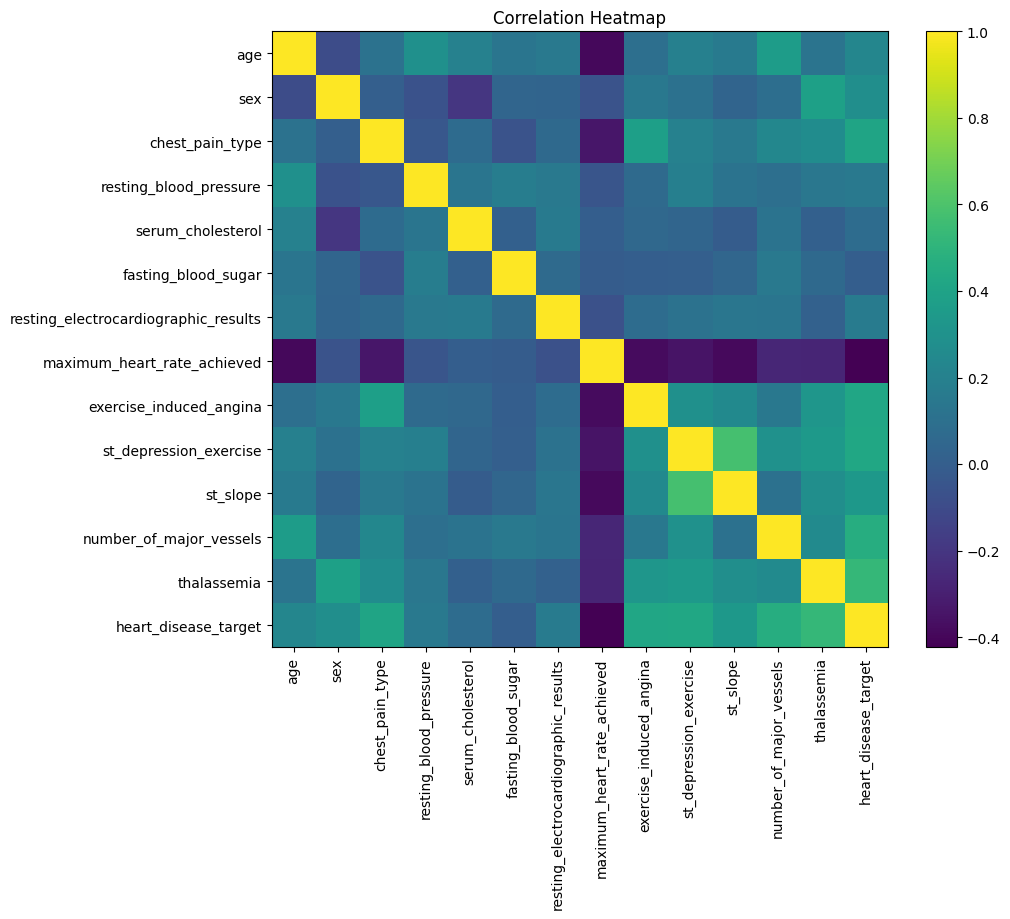

In [11]:
plt.figure(figsize=(10, 8))
corr = df.corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
output_path = r"D:\MLOPS\DSA\PROJECT_HEART\heart_disease\heart_cleaned1.csv"

df.to_csv(output_path, index=False)

print("Cleaned dataset saved to:", output_path)


Cleaned dataset saved to: D:\MLOPS\DSA\PROJECT_HEART\heart_disease\heart_cleaned1.csv


In [14]:
df.shape


(297, 14)